<a href="https://colab.research.google.com/github/shourya2002-geek/ML-and-Data-analytics/blob/ML-Projects/HackSub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import xgboost as xgb



In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/shourya2002-geek/ML-and-Data-analytics/Datasets/EarthTrain.csv')

In [ ]:
test = pd.read_csv('https://raw.githubusercontent.com/shourya2002-geek/ML-and-Data-analytics/Datasets/EarthTest.csv')
deal = test['Deal_title']

In [ ]:
df.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,Geography,Location,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506$,2067263.7$,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,USA,"Killeen-Temple, TX",Charlene Werner,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3,73.6
1,TitleKIW18,Bender PLC LLC,Construction Services,39488$,240876.8$,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,India,Ratlam,rakhi,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.9
2,TitleFXSDN,Carter-Henry and Sons,Hospitals/Clinics,359392$,2407926.4$,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,USA,"Albany-Schenectady-Troy, NY",Ariel Hamilton,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4,68.8
3,TitlePSK4Y,Garcia Ltd Ltd,Real Estate,76774$,468321.4$,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,USA,"Mount Vernon-Anacortes, WA",Erin Wilson,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.5
4,Title904GV,Lee and Sons PLC,Financial Services,483896$,NaN,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,India,Shimoga,kavita,Executive Vice President,mr.christopher@lee.com,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.4


In [ ]:
test.shape

(2093, 22)

In [ ]:
pd.Series(df['Geography']).value_counts()

USA      3061
India    2974
Name: Geography, dtype: int64

In [ ]:
type(df['Location'])

pandas.core.series.Series

In [ ]:
pd.Series(df['Last_lead_update']).value_counts()

Following up but lead not responding    627
Up-to-date                              623
more than a month                       605
No track                                601
?                                       585
5 days back                             564
2 days back                             559
More than 2 weeks                       556
More than a week back                   554
Did not hear back after Level 1         553
Pending                                 547
Name: Last_lead_update, dtype: int64

In [ ]:
df1 = df.drop(columns=['Location', 'POC_name','Designation','Internal_POC','Deal_title','Lead_name','Date_of_creation','Contact_no','Lead_POC_email'])

In [ ]:
test1 = test.drop(columns=['Location', 'POC_name','Designation','Internal_POC','Deal_title','Lead_name','Date_of_creation','Contact_no','Lead_POC_email'])

In [ ]:
df1.head(10)

,Industry,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Geography,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Resource,Internal_rating,Success_probability
0,Restaurants,320506$,2067263.7$,Product_2,50 - 100 Million,Category 2,USA,Community pharmacist,Website,Level 3,No track,NaN,3,73.6
1,Construction Services,39488$,240876.8$,Product_2,500 Million - 1 Billion,Category 4,India,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,No,5,58.9
2,Hospitals/Clinics,359392$,2407926.4$,Product_1,500 Million - 1 Billion,Category 4,USA,Health service manager,Marketing Event,Level 1,?,No,4,68.8
3,Real Estate,76774$,468321.4$,Product_2,500 Million - 1 Billion,Category 3,USA,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,We have all the requirements,1,64.5
4,Financial Services,483896$,NaN,Product_2,50 - 100 Million,Category 3,India,Media planner,Website,Level 2,Up-to-date,No,4,62.4
5,Banks,418674$,2637646.2$,Product_1,50 - 100 Million,Category 2,India,Microbiologist,Marketing Event,Level 3,2 days back,Deliverable,3,66.3
6,Banks,384356$,2709709.8$,Product_2,500 Million - 1 Billion,Category 1,NaN,Cartographer,Contact Email,Level 3,More than 2 weeks,NaN,4,73.4
7,Architecture/Engineering,245205$,1642873.5$,Product_2,500 Million - 1 Billion,Category 1,USA,"Engineer, maintenance (IT)",Others,Level 2,5 days back,No,5,74.1
8,Education/Training,343280$,1991024.0$,Product_1,100 - 500 Million,Category 3,USA,Product/process development scientist,Contact Email,Level 1,No track,We have all the requirements,2,61.4
9,REIT,293611$,1791027.1$,Product_1,500 Million - 1 Billion,Category 3,USA,Engineering geologist,Contact Email,Level 1,more than a month,Deliverable,4,66.0


In [ ]:
df1.head()

,Industry,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Geography,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Resource,Internal_rating,Success_probability
0,Restaurants,320506$,2067263.7$,Product_2,50 - 100 Million,Category 2,USA,Community pharmacist,Website,Level 3,No track,NaN,3,73.6
1,Construction Services,39488$,240876.8$,Product_2,500 Million - 1 Billion,Category 4,India,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,No,5,58.9
2,Hospitals/Clinics,359392$,2407926.4$,Product_1,500 Million - 1 Billion,Category 4,USA,Health service manager,Marketing Event,Level 1,?,No,4,68.8
3,Real Estate,76774$,468321.4$,Product_2,500 Million - 1 Billion,Category 3,USA,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,We have all the requirements,1,64.5
4,Financial Services,483896$,NaN,Product_2,50 - 100 Million,Category 3,India,Media planner,Website,Level 2,Up-to-date,No,4,62.4


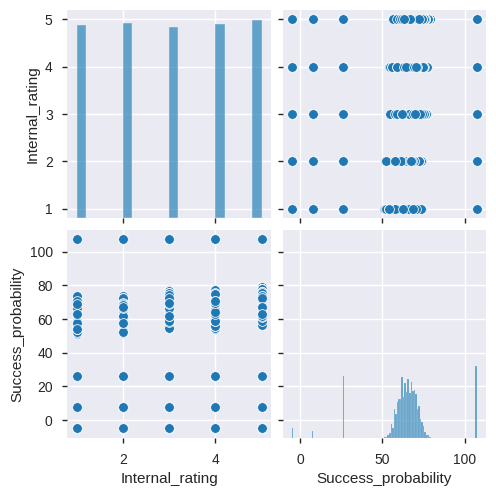

In [ ]:
sns.pairplot(df1)

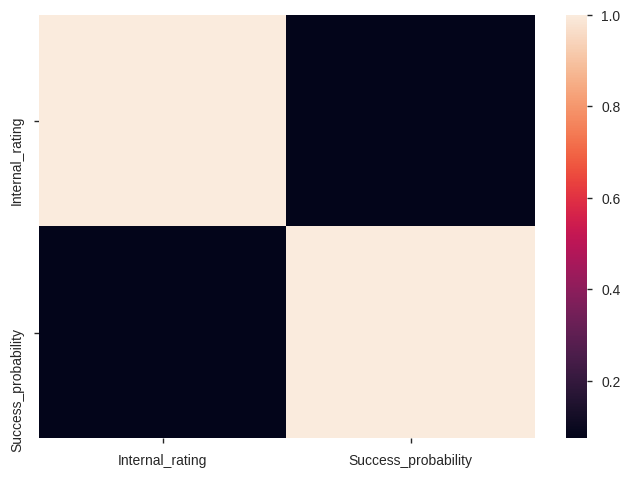

In [ ]:
sns.heatmap(df1.corr())

In [ ]:
df1=df1.drop(columns=['Weighted_amount','Geography','Last_lead_update','Industry','Hiring_candidate_role'],axis=1)
test1=test1.drop(columns=['Weighted_amount','Geography','Last_lead_update','Industry','Hiring_candidate_role'],axis=1)

In [ ]:
df1.head()

,Deal_value,Pitch,Lead_revenue,Fund_category,Lead_source,Level_of_meeting,Resource,Internal_rating,Success_probability
0,320506$,Product_2,50 - 100 Million,Category 2,Website,Level 3,NaN,3,73.6
1,39488$,Product_2,500 Million - 1 Billion,Category 4,Others,Level 1,No,5,58.9
2,359392$,Product_1,500 Million - 1 Billion,Category 4,Marketing Event,Level 1,No,4,68.8
3,76774$,Product_2,500 Million - 1 Billion,Category 3,Contact Email,Level 2,We have all the requirements,1,64.5
4,483896$,Product_2,50 - 100 Million,Category 3,Website,Level 2,No,4,62.4


In [ ]:
df1.head()

,Deal_value,Pitch,Lead_revenue,Fund_category,Lead_source,Level_of_meeting,Resource,Internal_rating,Success_probability
0,320506$,Product_2,50 - 100 Million,Category 2,Website,Level 3,NaN,3,73.6
1,39488$,Product_2,500 Million - 1 Billion,Category 4,Others,Level 1,No,5,58.9
2,359392$,Product_1,500 Million - 1 Billion,Category 4,Marketing Event,Level 1,No,4,68.8
3,76774$,Product_2,500 Million - 1 Billion,Category 3,Contact Email,Level 2,We have all the requirements,1,64.5
4,483896$,Product_2,50 - 100 Million,Category 3,Website,Level 2,No,4,62.4


In [ ]:
test1.head()

,Deal_value,Pitch,Lead_revenue,Fund_category,Lead_source,Level_of_meeting,Resource,Internal_rating
0,200988$,Product_1,100 - 500 Million,Category 4,Marketing Event,Level 1,No,-1.0
1,409961$,Product_1,100 - 500 Million,Category 3,Marketing Event,Level 2,Yes,1.0
2,434433$,Product_1,100 - 500 Million,Category 1,Marketing Event,Level 2,Deliverable,5.0
3,218952$,Product_2,100 - 500 Million,Category 1,Contact Email,Level 3,No,5.0
4,392835$,Product_1,500 Million - 1 Billion,Category 3,Others,Level 3,Deliverable,2.0


In [ ]:
df1['Deal_value'] = df1['Deal_value'].str.replace('$', '').astype(float)
test1['Deal_value'] = test1['Deal_value'].str.replace('$', '').astype(float)

In [ ]:
df1=pd.get_dummies(df1)
test1=pd.get_dummies(test1)
X = df1.drop(['Success_probability'],axis=1)
Y = df1['Success_probability']
X.head()

,Deal_value,Internal_rating,Pitch_Product_1,Pitch_Product_2,Lead_revenue_100 - 500 Million,Lead_revenue_50 - 100 Million,Lead_revenue_500 Million - 1 Billion,Fund_category_Category 1,Fund_category_Category 2,Fund_category_Category 3,Fund_category_Category 4,Lead_source_Contact Email,Lead_source_Marketing Event,Lead_source_Others,Lead_source_Website,Level_of_meeting_Level 1,Level_of_meeting_Level 2,Level_of_meeting_Level 3,Resource_Cannot deliver,Resource_Deliverable,Resource_No,Resource_Not enough,Resource_We have all the requirements,Resource_Yes
0,320506.0,3,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,39488.0,5,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0
2,359392.0,4,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0
3,76774.0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
4,483896.0,4,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0


In [ ]:
model = xgb.XGBRegressor()
model.fit(X,Y)

[16:11:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
Y_pred = model.predict(test1)



In [ ]:
Y_pred

array([62.200947, 61.010414, 67.864204, ..., 61.448235, 63.918583,
       63.208748], dtype=float32)

In [ ]:
Y_pred=pd.DataFrame(Y_pred)
Y_pred=pd.concat([deal,Y_pred],axis=1)
Y_pred.columns=['Deal_title','Success_probability']

In [ ]:
Y_pred

,Deal_title,Success_probability
0,TitleAD16O,62.200947
1,TitleOW6CR,61.010414
2,TitleVVJQ5,67.864204
3,TitleUS8NA,69.176857
4,Title5VGWW,64.475937
...,...,...
2088,Title2R8VU,63.807365
2089,Title7HCNJ,64.432190
2090,TitleCD5YZ,61.448235
2091,Title8OKXL,63.918583


In [ ]:
from google.colab import files
Y_pred.to_csv('XG.csv') 
files.download('XG.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>